In [1]:
%pylab inline
import pandas as pd
import re

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
df = pd.read_csv('lianjia.csv')

In [4]:
def extract_info(s, pattern):
    result = re.findall(pattern, s)
    if len(result) > 0:
        return result[0]
    else:
        return np.nan

In [5]:
df['unitPrice'] = df.apply(lambda row: extract_info(row['houseUnitPrice'], pattern=r'\d+'), axis=1)
df['halls'] = df.apply(lambda row: extract_info(row['houseInfo'], pattern=r'\d(?=厅)'), axis=1)
df['areas'] = df.apply(lambda row: extract_info(row['houseInfo'], pattern=r'(\d+\.\d+|\d+)(?=平米)'), axis=1)
df['followers'] = df.apply(lambda row: extract_info(row['houseFollowInfo'], pattern=r'\d+(?=人关注)'), axis=1)
df['rooms'] = df.apply(lambda row: extract_info(row['houseInfo'], pattern=r'\d(?=室)'), axis=1)

In [6]:
df.columns

Index(['title', 'houseLoc', 'houseInfo', 'housePosition', 'housePositionInfo',
       'houseFollowInfo', 'houseSubway', 'houseTaxfree', 'houseHaskey',
       'houseTotalPrice', 'housePriceUnit', 'houseUnitPrice', 'houseUrl',
       'unitPrice', 'halls', 'areas', 'followers', 'rooms'],
      dtype='object')

In [7]:
df2 = df.reindex(columns=['title', 'houseLoc', 'unitPrice', 'areas', 'houseTotalPrice', 'housePriceUnit', 
            'houseInfo', 'housePosition', 'housePositionInfo' ,
            'rooms', 'halls', 'followers',
           'houseFollowInfo', 'houseSubway', 'houseTaxfree', 'houseHaskey',
           'houseUnitPrice', 'houseUrl'])

In [8]:
df2.to_excel('lianjia.xlsx')

In [9]:
df2.drop('title', axis=1, inplace=True)

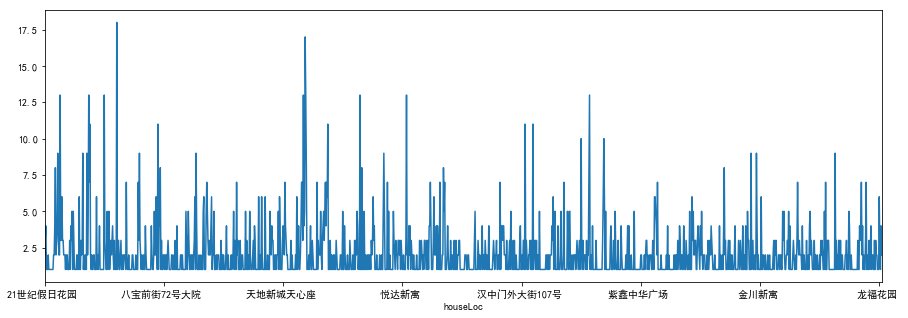

In [10]:
loc_group = df2.groupby('houseLoc').size().plot(figsize=(15, 5))

In [11]:
df2.groupby('houseLoc').size().sort_values(ascending=False)

houseLoc
丹佛小镇          18
天润城第十四街区      17
瑞金新村          13
东郊小镇第八街区      13
托乐嘉单身公寓       13
左邻右里          13
天润城第十街区       13
万达紫金明珠        13
天润城第十二街区      13
中海万锦熙岸一期      13
江佑铂庭          11
东郊小镇第四街区      11
江岸水城          11
威尼斯水城第十街区     11
保利梧桐语花园       11
百家湖西花园伦敦城     10
王府园小区         10
东渡国际青年城        9
万裕龙庭水岸         9
雅居乐花园          9
亚东城西区          9
弘阳旭日上城三区       9
金地自在城第二街区      9
金基汇锦国际         9
东郊小镇第三街区       9
华汇康城           9
诚品城            8
天润城第四街区        8
保利西江月          8
瑞金北村           8
              ..
花园路1号          1
尚书里            1
尚书巷            1
花园路22号         1
小行路35号         1
平家巷小区          1
平江府路           1
腾飞园            1
康盛花园           1
开元新寓           1
老虎桥            1
建盛丽庭           1
建康新村           1
建康大厦           1
建宁新村           1
聚福园二期          1
康美里            1
康福村            1
育仁雅居           1
广东路1至25号       1
胜利一村           1
胜利村100号        1
胜利村108号        1
胜泰华府           1
康业里            1
能仁里16号         1
能仁里1号          1
广州路21

In [12]:
df2.describe()

,houseTotalPrice
count,3030.000000
mean,282.635545
std,163.744245
min,28.000000
25%,180.000000
50%,240.000000
75%,335.000000
max,3000.000000


In [13]:
df2.loc[(df2.houseTotalPrice < 300) & (df2.housePositionInfo == '仙林'), ('houseLoc', 'unitPrice', 'areas',
                                    'houseTotalPrice', 'housePositionInfo',
                                   'houseUrl')].sort_values(by='areas', ascending=False)

,houseLoc,unitPrice,areas,houseTotalPrice,housePositionInfo,houseUrl
1861,诚品城,28278,99.02,280.0,仙林,https://nj.lianjia.com/ershoufang/103102111370...
212,诚品城,27804,98.91,275.0,仙林,https://nj.lianjia.com/ershoufang/103102148094...
2759,鸿运嘉园,25288,95.7,242.0,仙林,https://nj.lianjia.com/ershoufang/103102088326...
462,保利罗兰春天,30839,95.66,295.0,仙林,https://nj.lianjia.com/ershoufang/103102142985...
1984,保利罗兰春天,29812,95.6,285.0,仙林,https://nj.lianjia.com/ershoufang/103102107746...
352,万达茂,29787,95.01,283.0,仙林,https://nj.lianjia.com/ershoufang/103102144735...
1347,保利罗兰春天,28948,95,275.0,仙林,https://nj.lianjia.com/ershoufang/103102123931...
1622,金地湖城艺境,28623,94.33,270.0,仙林,https://nj.lianjia.com/ershoufang/103102117295...
1408,保利罗兰春天,30275,94.14,285.0,仙林,https://nj.lianjia.com/ershoufang/103102122602...
2493,诚品城,28665,92.45,265.0,仙林,https://nj.lianjia.com/ershoufang/103102093027...


In [14]:
df2.groupby('housePositionInfo').size().sort_values(ascending=False)

housePositionInfo
桥北       286
麒麟镇      125
奥体       111
仙林       105
百家湖      101
将军大道     101
东山镇       98
江浦街道      91
岔路口       88
龙江        85
秦虹        74
月牙湖       74
迈皋桥       61
江宁大学城     60
马群        57
洪家园       54
九龙湖       53
凤凰西街      53
瑞金路       46
新街口       44
铁心桥       42
应天西路      41
大光路       40
南湖        39
卫岗        38
来凤里       37
金陵小区      34
华侨路       33
热河南路      33
万达广场      30
        ... 
晓庄        16
雨花新村      16
夫子庙       16
茶南        15
挹江门       14
樱驼花园      14
玄武门       13
月苑        13
五塘广场      13
后宰门       12
小行        12
仙鹤门       12
福建路       11
湖西街       11
水佐岗       11
兴隆大街      10
万寿        10
朝天宫       10
江东        10
长乐路        9
常府街        8
水西门        7
江宁其它       7
燕子矶        5
北京东路       4
安德门        4
高新区        4
江心洲        3
溧水         1
栖霞其它       1
Length: 87, dtype: int64

In [15]:
df.corr()

,houseTotalPrice
houseTotalPrice,1.0
